In [1]:
"""Assignment 1."""
"""Authors: Tycjan Lamkiewicz, Julia Nocuń."""

import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

In [2]:
# Column names
column_names = ['sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Read csv file
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'data.csv')
df = pd.read_csv(file_path, names=column_names)

df['sex'] = df['sex'].replace({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

In [3]:
# Calculate the counts and percentages for the 'sex' column
sex_distribution = df['sex'].value_counts().reset_index()
sex_distribution.columns = [' ', 'count']
sex_distribution['%'] = (sex_distribution['count'] / len(df) * 100).round(2)

sex_distribution = sex_distribution.style \
    .hide(axis='index') \
    .format({'%': '{:.2f}'}) \
    .set_properties(**{'font-weight': 'bold',
                       'text-align': 'left'}, subset=[' '])

sex_distribution


,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [4]:
# Generate summary statistics for quantitative variables
quantitative_summary = df.describe().transpose()

quantitative_summary = quantitative_summary.drop(columns=['count'])

quantitative_summary


,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


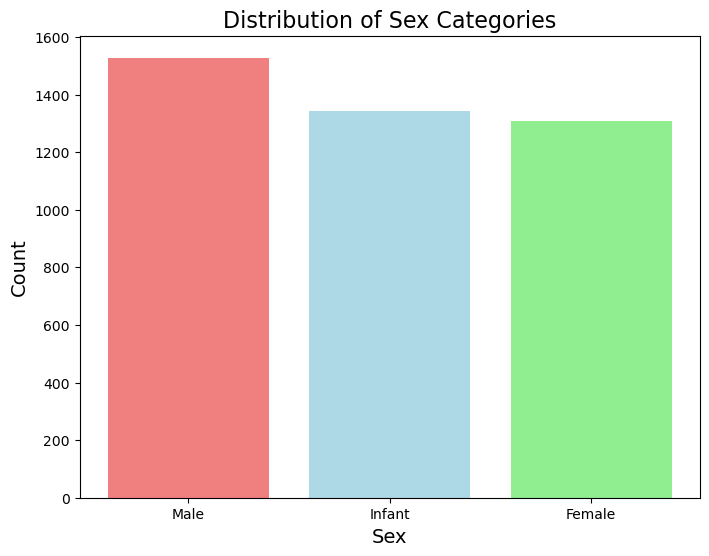

In [5]:
# Calculation of the number of occurrences for the variable 'sex'
sex_counts = df['sex'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Chart size
plt.bar(sex_counts.index, sex_counts.values,
        color=['lightcoral', 'lightblue', 'lightgreen'])

# Adding title and axis labels
plt.title('Distribution of Sex Categories', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14);


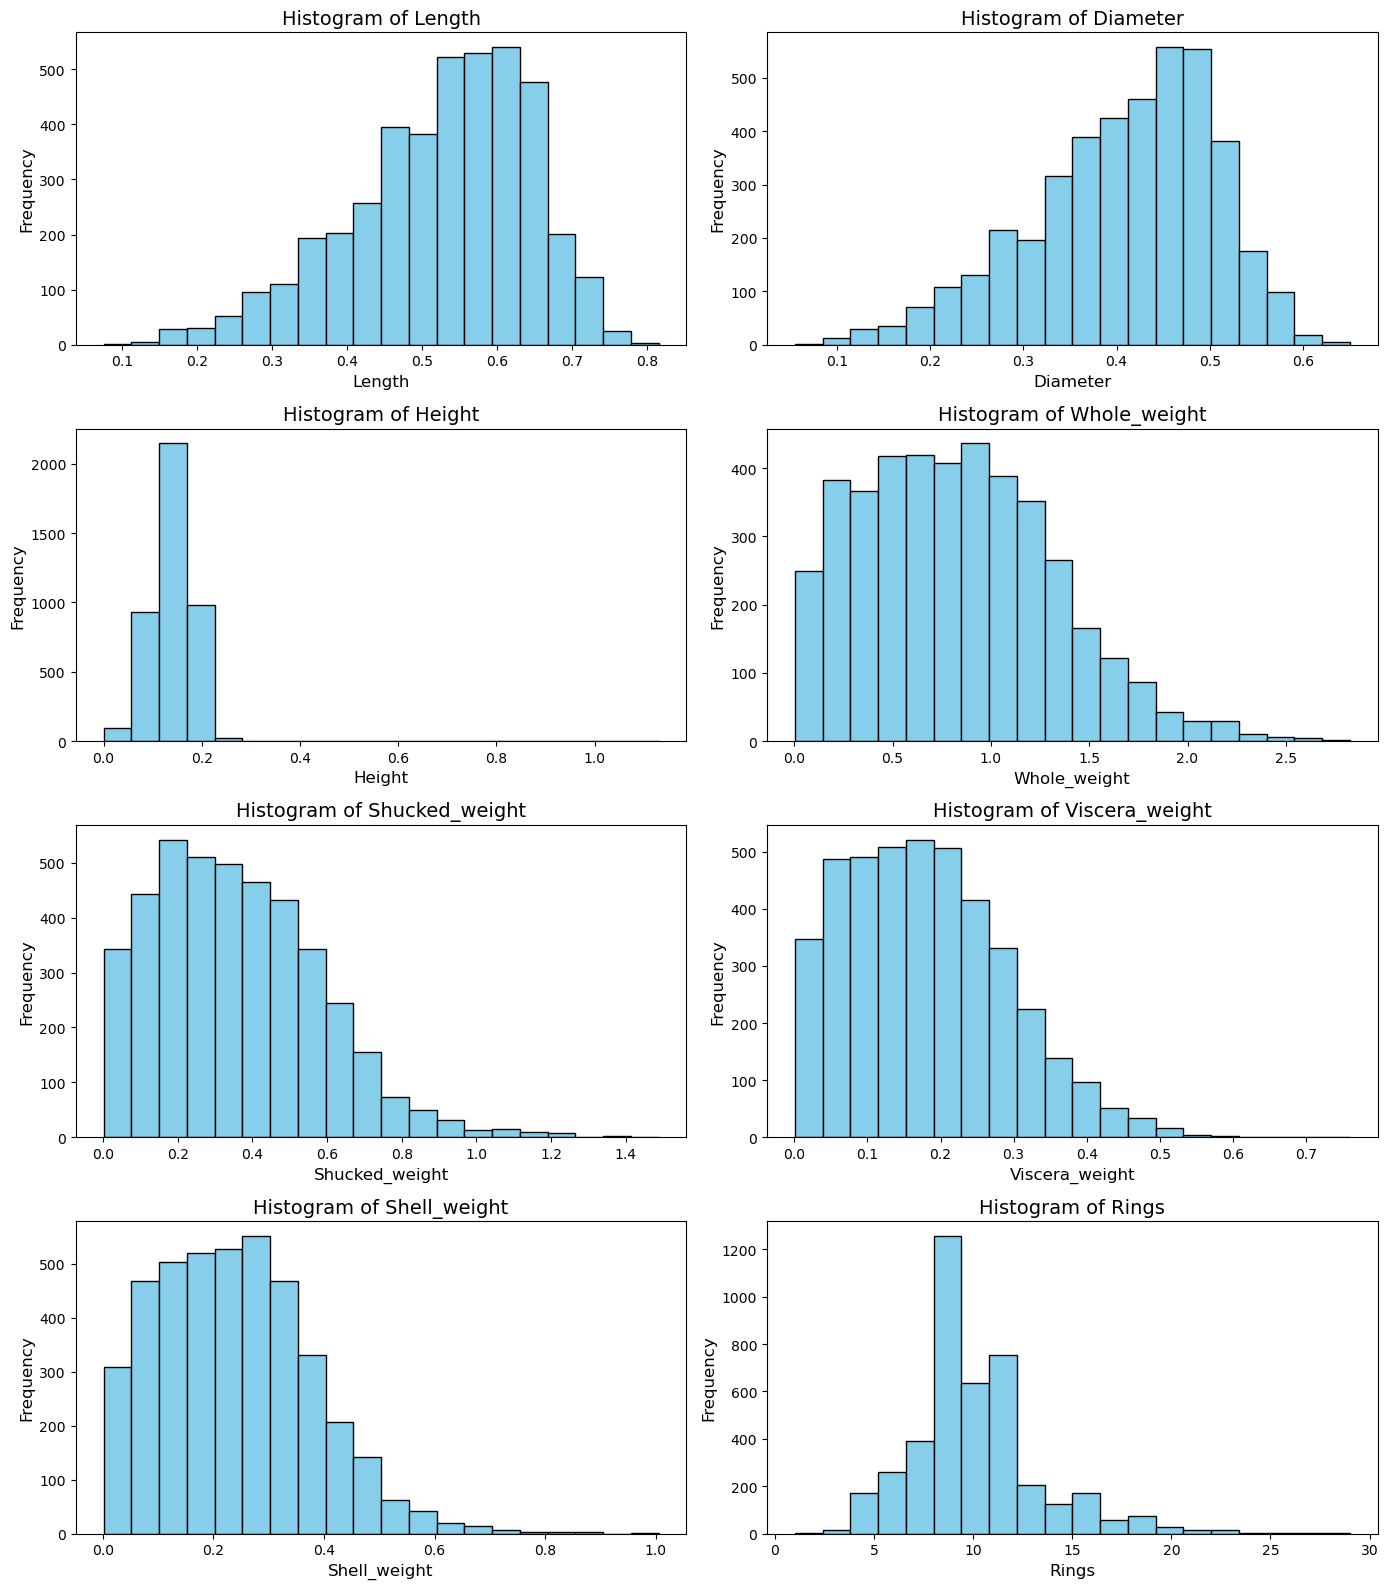

In [6]:
# List of quantitative variables in a dataset
quantitative_columns = ['Length', 'Diameter', 'Height', 'Whole_weight',
                        'Shucked_weight', 'Viscera_weight',
                        'Shell_weight', 'Rings']

# Setting the size of the figure and chart grid
plt.figure(figsize=(14, 16))

# Creating histograms for each quantitative variable
for i, col in enumerate(quantitative_columns, 1):
    plt.subplot(4, 2, i)  # 4 rows, 2 columns, ith chart
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)  # Title for each chart
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Optimal arrangement of elements
plt.tight_layout()

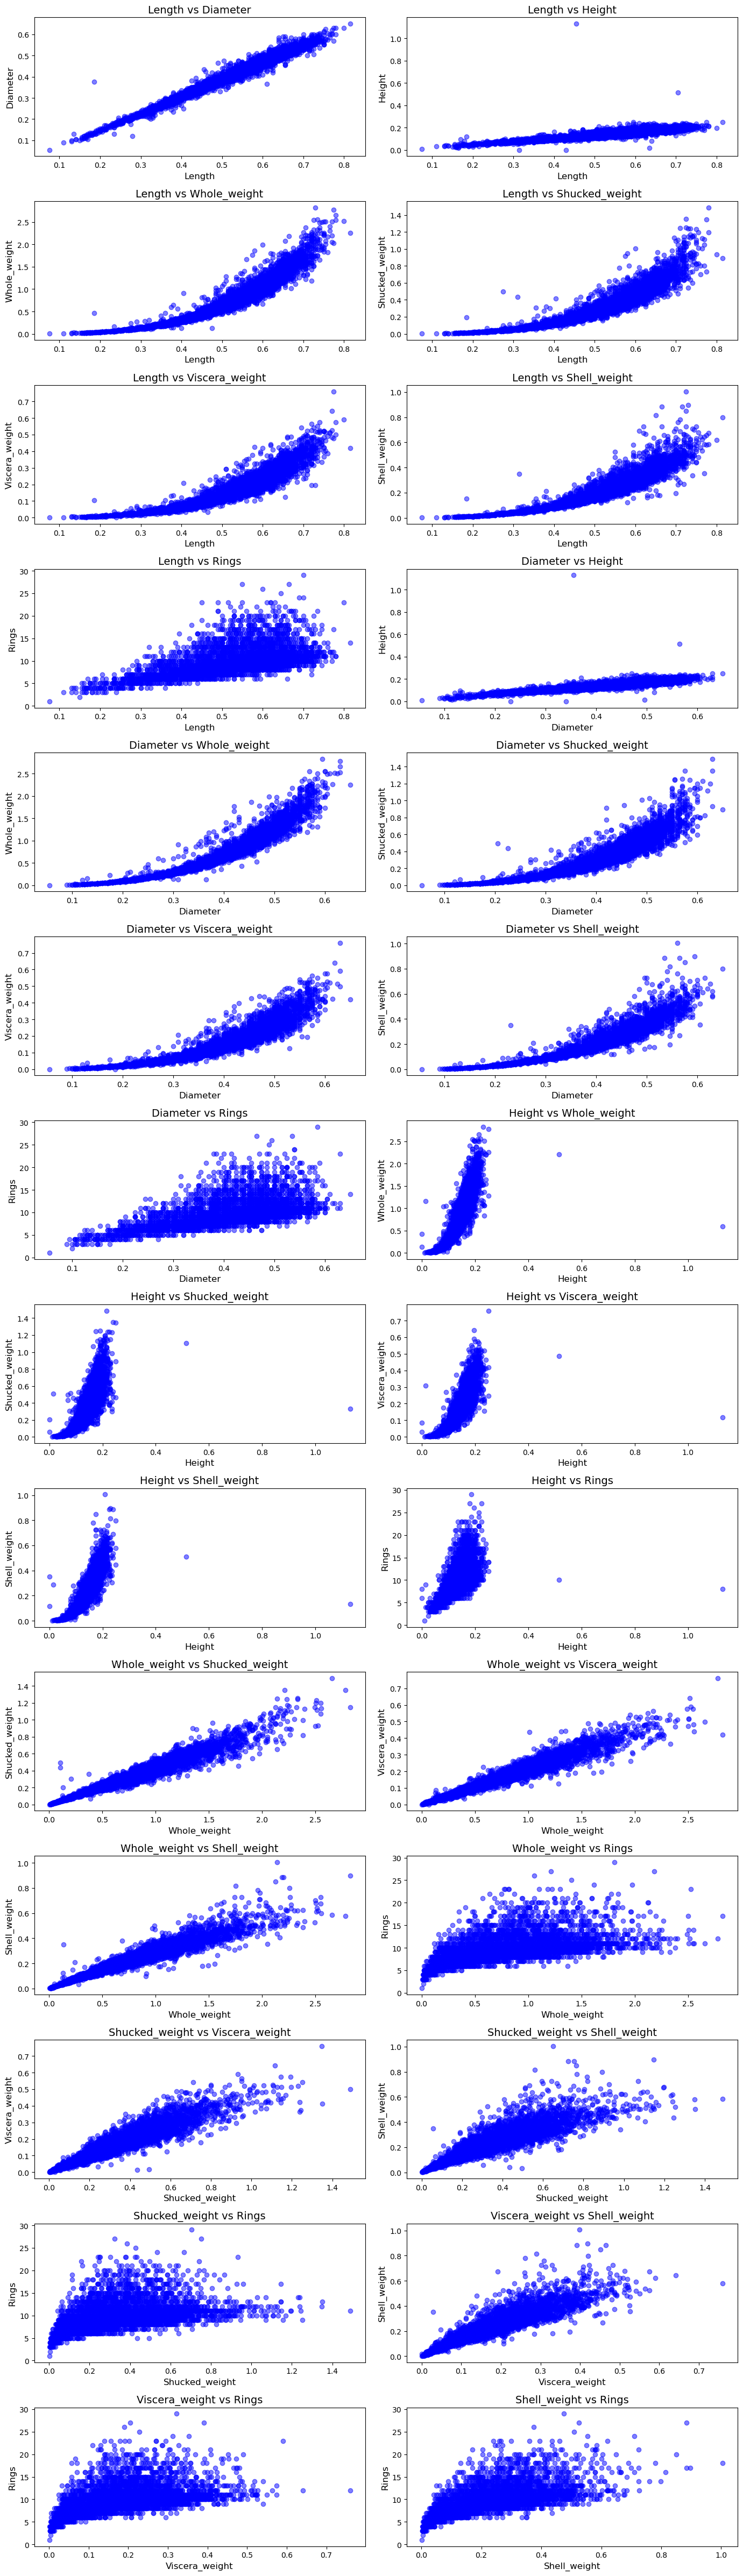

In [7]:
# Generating all possible combinations of pairs of quantitative variables
quantitative_pairs = list(combinations(quantitative_columns, 2))

plt.figure(figsize=(14, 48))

# Create scatter plots for each pair of quantitative variables
for i, (x_col, y_col) in enumerate(quantitative_pairs, 1):
    plt.subplot(14, 2, i)  # 14 rows, 2 columns, ith chart
    plt.scatter(df[x_col], df[y_col], color='b', alpha=0.5)  # scatter plot
    plt.title(f'{x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)

plt.tight_layout()

In [8]:
# Linear correlation matrix for the quantitative variables
correlation_matrix = df[quantitative_columns].corr()

correlation_matrix

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


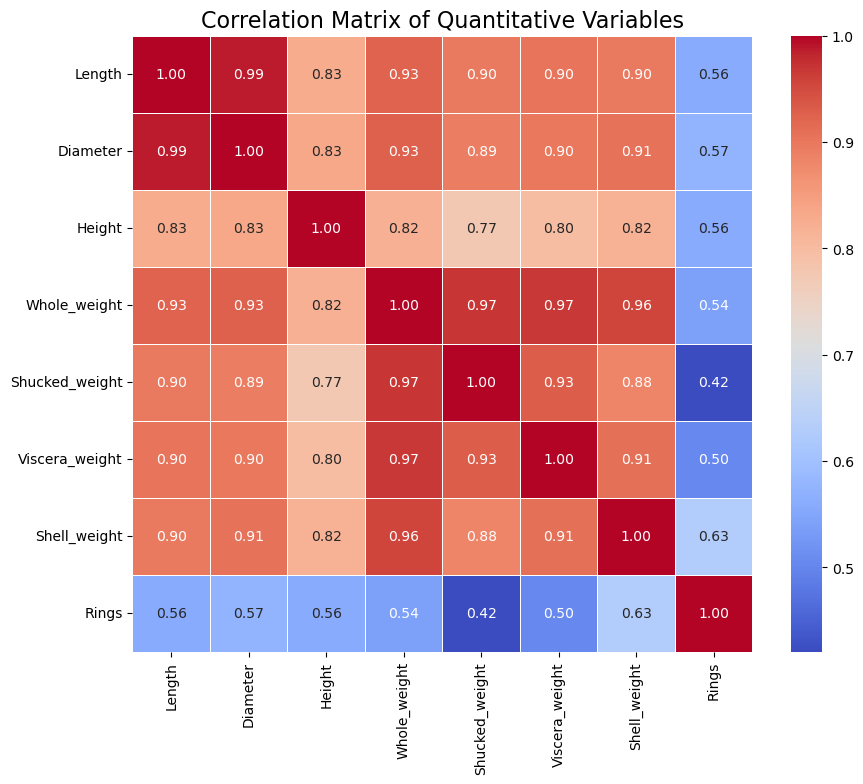

In [9]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5)
plt.title('Correlation Matrix of Quantitative Variables', fontsize=16);

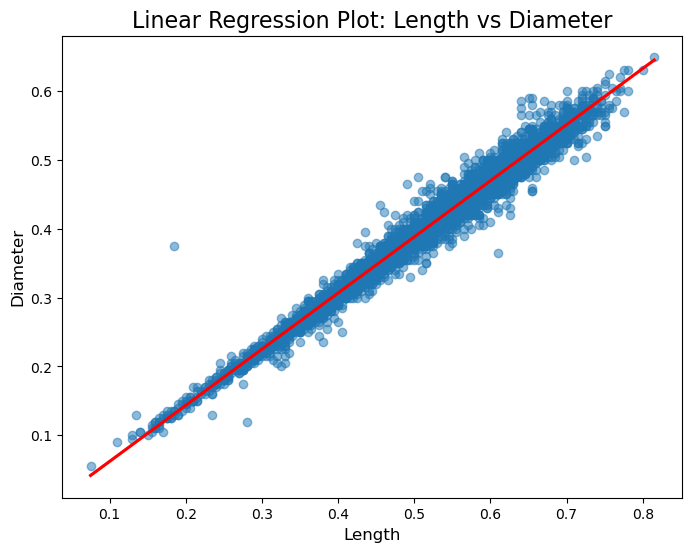

In [10]:
# Find the two quantitative variables with the highest absolute correlation
corr_unstacked = correlation_matrix.unstack()
# Sorting the absolute correlations, and skipping self-correlation (1.0)
strongest_pair = corr_unstacked[corr_unstacked < 1].abs().idxmax()

# Extract the two most strongly correlated variables
var1, var2 = strongest_pair

# Create a linear regression plot using Seaborn's regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=df[var1], y=df[var2], scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})
plt.title(f'Linear Regression Plot: {var1} vs {var2}', fontsize=16)
plt.xlabel(var1, fontsize=12)
plt.ylabel(var2, fontsize=12);

In [11]:
# Requirements for the maximum grade of 5

# Group the data by 'sex' and calculate the summary
# statistics for each quantitative variable
grouped_summary = df.groupby('sex')[quantitative_columns].describe()

# Extract relevant statistics by selecting the second level of the MultiIndex
grouped_summary = grouped_summary.loc[:, (slice(None), ['mean', 'std',
                                                        'min', '25%', '50%',
                                                        '75%', 'max'])]

# At this point, the index is a single-level
# index ('sex'), so rename it accordingly
grouped_summary.index.names = ['Sex']

# Use the future_stack implementation to stack the 'sex' index
grouped_summary = grouped_summary.stack(level=0, future_stack=True)

# Rename the index to have both 'Feature' and 'Sex'
grouped_summary.index.names = ['Sex', 'Feature']

# Swap the levels of the index to have 'Feature' first and 'Sex' second
grouped_summary = grouped_summary.swaplevel(0, 1)

# Sort the index by 'Feature' in the specified order
feature_order = ['Length', 'Diameter', 'Height', 'Whole_weight',
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Sort the DataFrame by this custom order for 'Feature'
grouped_summary = grouped_summary.loc[feature_order]

grouped_summary

mean       std     min       25%       50%  \
Feature        Sex                                                       
Length         Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
               Male     0.561391  0.102697  0.1550  0.505000   0.58000   
Diameter       Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
               Male     0.439287  0.084398  0.1100  0.395000   0.45500   
Height         Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
               Male     0.151381  0.034804  0.0250  0.130000   0.15500   
Whole_weight   Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
               Male     0.991459  0.470581  0.0155  0.671625   0.97575   
Shucked_weight Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
               Male     0.432946  0.223000  0.0065  0.276375   0.42175   
Viscera_weight Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
               Male     0.215545  0.104919  0.0030  0.145875   0.21000   
Shell_weight   Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
               Male     0.281969  0.130834  0.0050  0.190000   0.27600   
Rings          Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   
               Male    10.705497  3.026349  3.0000  9.000000  10.00000   

                             75%      max  
Feature        Sex                         
Length         Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
               Male     0.630000   0.7800  
Diameter       Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
               Male     0.500000   0.6300  
Height         Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
               Male     0.175000   0.5150  
Whole_weight   Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
               Male     1.265625   2.8255  
Shucked_weight Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
               Male     0.566000   1.3510  
Viscera_weight Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
               Male     0.278000   0.7600  
Shell_weight   Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
               Male     0.355500   0.8970  
Rings          Female  12.000000  29.0000  
               Infant   9.000000  21.0000  
               Male    12.000000  27.0000

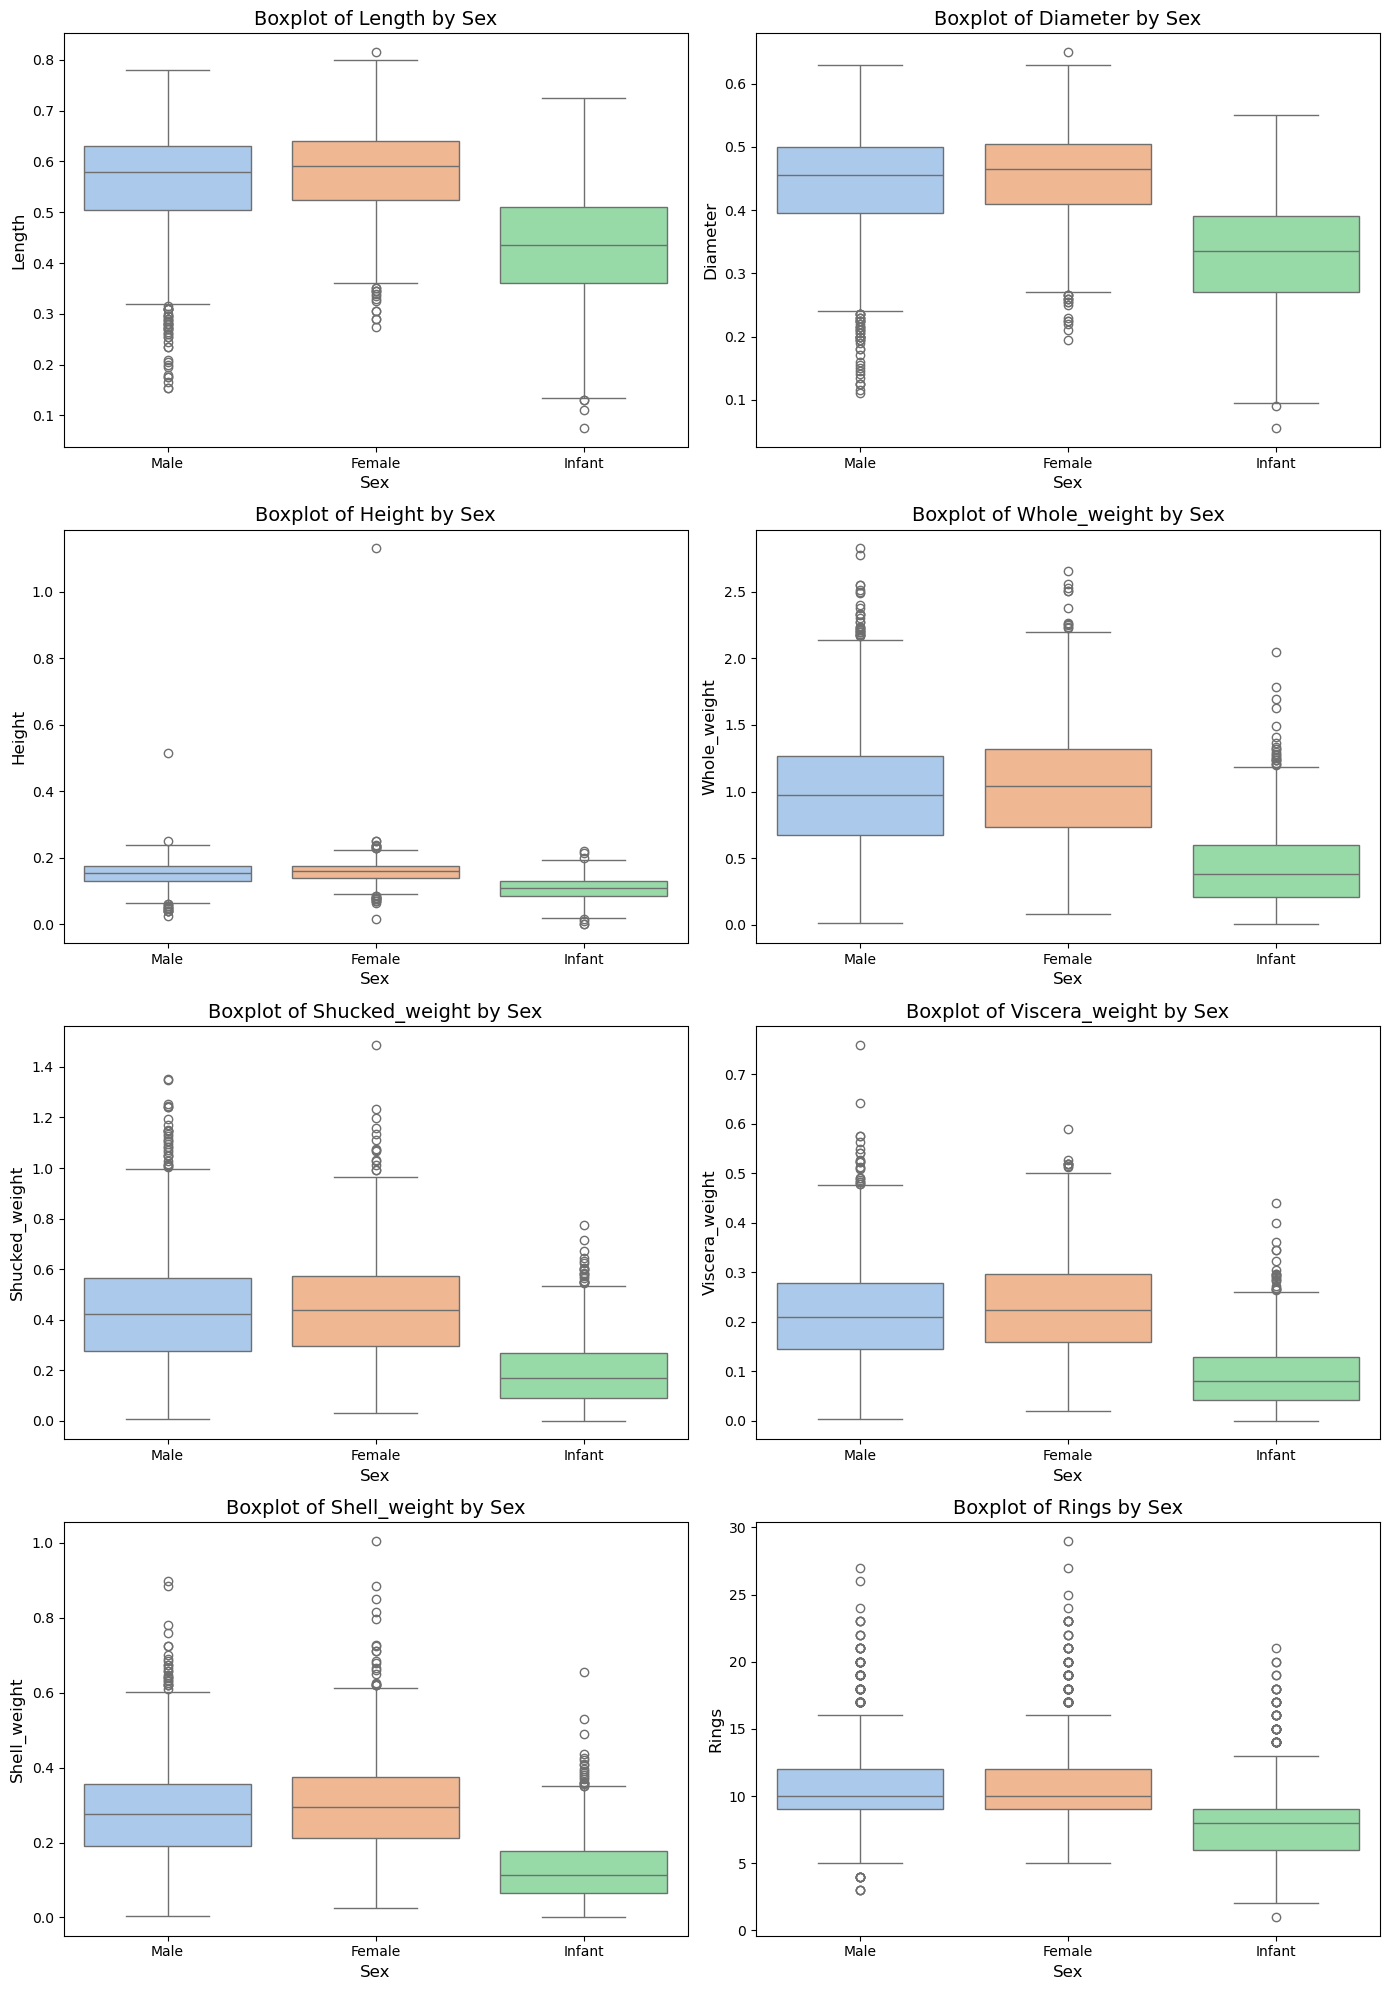

In [12]:
# Setting the size of the figure
plt.figure(figsize=(14, 20))

# Boxplots for each quantitative variable, grouped by the 'sex' variable
for i, col in enumerate(quantitative_columns, 1):
    plt.subplot(4, 2, i)  # 4 rows, 2 columns, i-th chart
    sns.boxplot(x='sex', y=col, data=df, hue='sex',
                palette='pastel', dodge=False)
    plt.title(f'Boxplot of {col} by Sex', fontsize=14)  # Title for each chart
    plt.xlabel('Sex', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.legend([], [], frameon=False)  # Legend removed

# Optimal arrangement of elements
plt.tight_layout()
